# Dogs vs Cats
## Kaggle Dataset의 일부를 이용한 개, 고양이 구분
### Dog Image: 1,111개, Cat Image: 1,111개, 총 2,222개
### 출처: [pontoregende GitHub](https://github.com/pontorezende/Dogs-vs-Cats-Redux-with-CNN)

In [1]:
from keras.preprocessing import image
from glob import glob
import cv2, os, random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
%matplotlib inline

Using TensorFlow backend.


In [2]:
path='../dataset/dogs-vs-cats/train/'

In [3]:
## used for resize and in our model
ROW, COL = 96, 96

dogs, cats = [], []
y_dogs, y_cats = [], []

In [4]:
dog_path = os.path.join(path, 'dog.5*')
len(glob(dog_path))

1111

In [5]:
## Load some our dog images (1,111 개 이미지)
dog_path = os.path.join(path, 'dog.5*')
for dog_img in glob(dog_path):
    dog = cv2.imread(dog_img)
    dog = cv2.cvtColor(dog, cv2.COLOR_BGR2GRAY)
    dog = cv2.resize(dog, (ROW, COL))
    dog = image.img_to_array(dog)
    dogs.append(dog)
print('Some dog images starting with 5 loaded')

Some dog images starting with 5 loaded


In [6]:
## Definition to load some our cat images (1,111 개 이미지)
cat_path = os.path.join(path, 'cat.5*')
for cat_img in glob(cat_path):
    cat = cv2.imread(cat_img)
    cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)
    cat = cv2.resize(cat, (ROW, COL))
    cat = image.img_to_array(cat)
    cats.append(cat)
print('Some cat images starting with 5 loaded')

Some cat images starting with 5 loaded


In [7]:
classes = ['dog', 'cat']

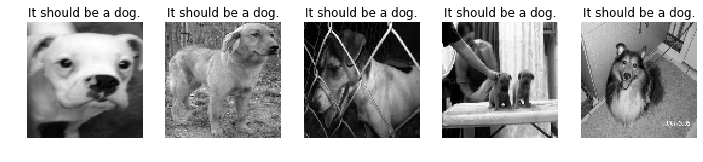

In [8]:
plt.figure(figsize=(12,8))    
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(dogs))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[0]))        
plt.show()

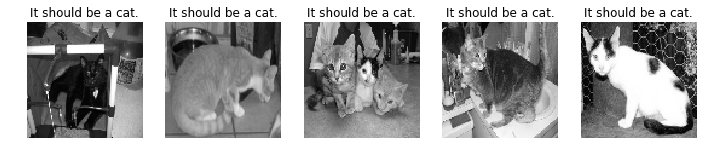

In [9]:
plt.figure(figsize=(12,8))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = image.array_to_img(random.choice(cats))
    plt.imshow(img, cmap=plt.get_cmap('gray'))

    plt.axis('off')
    plt.title('It should be a {}.'.format(classes[1]))
plt.show()

In [10]:
## just change the labels for 0 and  1
y_dogs = [1 for item in enumerate(dogs)]
y_cats = [0 for item in enumerate(cats)]

In [11]:
## converting everything to Numpy array to fit in our model
## them creating a X and target file like we used to see
## in Machine and Deep Learning models
dogs = np.asarray(dogs).astype('float32')
cats = np.asarray(cats).astype('float32')
y_dogs = np.asarray(y_dogs).astype('int32')
y_cats = np.asarray(y_cats).astype('int32')

In [12]:
## fit values between 0 and 1
dogs /= 255
cats /= 255

In [13]:
X = np.concatenate((dogs,cats), axis=0)
y = np.concatenate((y_dogs, y_cats), axis=0)

In [14]:
len(X)

2222

In [15]:
IMG_CHANNEL = 1
BATCH_SIZE = 32
N_EPOCH = 40
VERBOSE = 2
VALIDAION_SPLIT = .2
OPTIM = Adam()
N_CLASSES = len(classes)

In [16]:
## One-Hot Encoding
y = np_utils.to_categorical(y, N_CLASSES)
print('One-Hot Encoding done')

One-Hot Encoding done


In [17]:
## Here is our model as a CNN
model = Sequential([
    Conv2D(32, (3,3), padding='same', input_shape=(ROW, COL, IMG_CHANNEL), activation='relu'),
    Conv2D(32, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(.5),
    Dense(N_CLASSES, activation='softmax')
])

print('The model was created by following config:')
model.summary()

W0813 11:48:27.094043  5908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0813 11:48:27.094043  5908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0813 11:48:27.094043  5908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0813 11:48:27.134243  5908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0813 11:48:27.137243  5908 deprecation_wrapper.py:119] From C:\ProgramData\Ana

The model was created by following config:
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (Non

In [18]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])

W0813 11:48:38.926128  5908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 11:48:38.941728  5908 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [19]:
## to save checkpoint to use later
checkpoint = ModelCheckpoint('model_checkpoint/dogs_vs_cats_checkpoint.h5')
model.fit(X, y, batch_size=BATCH_SIZE, epochs=N_EPOCH, validation_split=VALIDAION_SPLIT,
          verbose=VERBOSE, callbacks=[checkpoint])

W0813 11:48:42.112542  5908 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1777 samples, validate on 445 samples
Epoch 1/40
 - 59s - loss: 0.7137 - acc: 0.6044 - val_loss: 0.8557 - val_acc: 0.0000e+00
Epoch 2/40
 - 56s - loss: 0.6596 - acc: 0.6252 - val_loss: 0.8572 - val_acc: 0.0000e+00
Epoch 3/40
 - 56s - loss: 0.6562 - acc: 0.6348 - val_loss: 0.7489 - val_acc: 0.3146
Epoch 4/40
 - 56s - loss: 0.6604 - acc: 0.6246 - val_loss: 0.9328 - val_acc: 0.0539
Epoch 5/40
 - 56s - loss: 0.6344 - acc: 0.6579 - val_loss: 1.2979 - val_acc: 0.1528
Epoch 6/40
 - 56s - loss: 0.6256 - acc: 0.6629 - val_loss: 0.8363 - val_acc: 0.2382
Epoch 7/40
 - 56s - loss: 0.6046 - acc: 0.6764 - val_loss: 0.6612 - val_acc: 0.4719
Epoch 8/40
 - 56s - loss: 0.5922 - acc: 0.6781 - val_loss: 0.8628 - val_acc: 0.2989
Epoch 9/40
 - 56s - loss: 0.5447 - acc: 0.7186 - val_loss: 1.0900 - val_acc: 0.2629
Epoch 10/40
 - 56s - loss: 0.5172 - acc: 0.7361 - val_loss: 1.0184 - val_acc: 0.2697
Epoch 11/40
 - 56s - loss: 0.4600 - acc: 0.7727 - val_loss: 0.7183 - val_acc: 0.6225
Epoch 12/40
 - 56s 

In [20]:
scores = model.evaluate(X, y, verbose=2)
print('MODEL ACCURACY\n{}: {}%'.format(model.metrics_names[1], scores[1]*100))

MODEL ACCURACY
acc: 92.03420342034204%


In [22]:
model_name = 'Dogs-and-Cats-1111-CNN'
## saving architecture
model_json = model.to_json()
open(model_name+'.json', 'w').write(model_json)
print('JSON saved')

## and the weights learned by our deep network on the training set
model.save(model_name+'.h5', overwrite=True)
print('.h5 saved')

model.save_weights(model_name+'_weights.h5', overwrite=True)
print('Weights saved in .h5 file')

JSON saved
.h5 saved
Weights saved in .h5 file
